<a href="https://colab.research.google.com/github/samiHEL/DA_Attractivite/blob/main/DA_HELLA_SAMI_Attractivit%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
# import numpy as np
import seaborn 
import matplotlib.pyplot as plot

data = pd.read_csv(r'/content/drive/MyDrive/lovoo_v3_users_api-results.csv')
data

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,userId,pictureId,isSystemProfile
0,F,M,25,daeni,1.00,4,8279,239,0,3,...,1,2015-04-25T20:43:26Z,1.429995e+09,0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN
1,F,M,22,italiana 92,0.85,5,663,13,0,0,...,1,2015-04-26T09:19:35Z,1.430040e+09,0,NaN,NaN,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,NaN
2,F,M,21,Lauraaa,0.00,4,1369,88,0,2,...,1,2015-04-06T14:24:07Z,1.428330e+09,0,NaN,NaN,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN
3,F,none,20,Qqkwmdowlo,0.12,3,22187,1015,2,3,...,1,2015-04-07T11:21:01Z,1.428406e+09,0,NaN,NaN,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN
4,F,M,21,schaessie {3,0.15,12,35262,1413,9,12,...,1,2015-04-06T14:25:20Z,1.428330e+09,0,NaN,NaN,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,F,M,22,Ser**a,0.85,6,1003,98,0,0,...,1,2015-04-05T07:13:49Z,1.428218e+09,0,1.0,NaN,Fiesta and sport,CRYu9vQnJ8lHU2pVpimKJGIyTHqR73rAu8hg21rtn340Ys...,405009d5e3983c4cd863ae43fd6356a0,NaN
3988,F,M,24,Mon**a,1.00,7,6890,563,0,0,...,1,2015-04-19T11:00:59Z,1.429441e+09,0,1.0,NaN,"tous des créatures de Dieu, y'a pas de VIP!!!",CRYuikFTcdFDsGDJugu3PyvSonM1LYwyviJXvZBUayBMgI...,7e0ddbdb1bd293c96d4a5ec5d0466923,NaN
3989,F,M,20,Fa**y,0.90,4,1157,52,1,0,...,1,2015-04-19T08:37:52Z,1.429433e+09,0,1.0,NaN,NaN,CRYv9Qg5MTSHaqrTK2CMe9cPRNACAFdYDi7BEgoQTyljzz...,768ddd66fd1df8a05c2f27505eb1c710,NaN
3990,F,M,20,Fa**y,0.90,4,1157,52,1,0,...,1,2015-04-19T08:37:52Z,1.429433e+09,0,1.0,NaN,NaN,CRYwD9ZmbjDXJu8li2DPXI0UseBJt2lovQBWnbKcGDVVcs...,768ddd66fd1df8a05c2f27505eb1c710,NaN


Caracteristiques cible: ce qui va définir l'attractivité d'un utilisateur : 	

*   counts_profileVisits 
*   counts_kisses 
*   counts_fans	 	 


explicatives:


*   age ?
*   time online ?
*   Country ?
*   Count Detail ?
*   nb_Picture ?
*   nb_langue ?
*   Compte verifié ?




# Tester le lien entre les 3 caracteristiques principales :

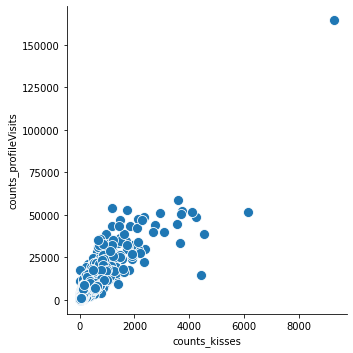

In [129]:
df = pd.DataFrame(data=data, columns=['counts_kisses','counts_profileVisits'])
seaborn.relplot(x=df["counts_kisses"], y=df["counts_profileVisits"], s = 100)
plot.show(); 

Trés bonne corelation entre 'counts_kisses' et 'counts_profileVisits' proche de 1 ... 0,9

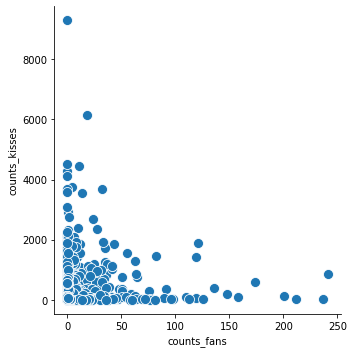

In [130]:
df = pd.DataFrame(data=data, columns=['counts_fans','counts_kisses'])
seaborn.relplot(x=df["counts_fans"], y=df["counts_kisses"], s = 100)
plot.show(); 

Corelation tres basse, les 'counts_fans' n'influent pas sur les autres caracteristiques principales.

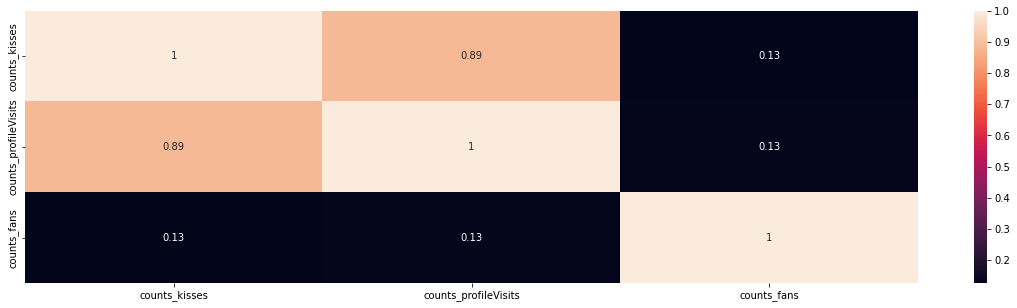

In [131]:
df = pd.DataFrame(data=data, columns=['counts_kisses','counts_profileVisits','counts_fans'])
corr=df.corr()
f, ax = plot.subplots(figsize=(20,5))
seaborn.heatmap(corr, annot=True, ax =ax)
plot.savefig('heatmapEX1.png')

Corelation de 0,89 entre Nombre de vue et like.
Ce heatmap confirme l'idée que nous allons baser l'attractivité sur le nombre de like et de vue de profil.

# Qu'est ce qui influe sur le nombre de like et de vue de profil ??

Le nombre de photo:

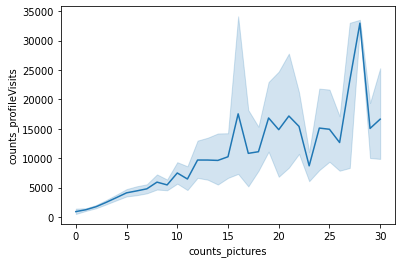

In [132]:
df = pd.DataFrame(data=data, columns=['counts_pictures','counts_profileVisits'])
seaborn.lineplot(x=df["counts_pictures"], y=df["counts_profileVisits"])
plot.show(); 


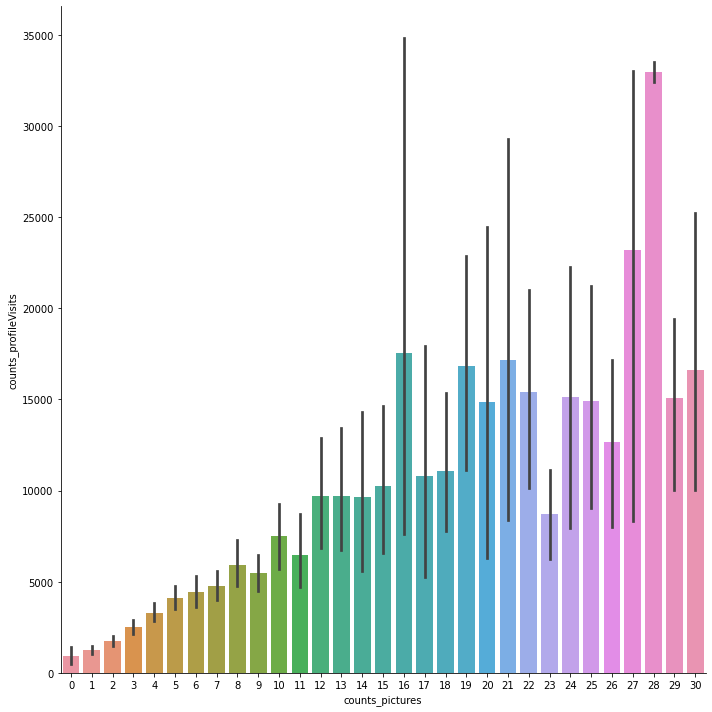

In [6]:
df = pd.DataFrame(data=data, columns=['counts_pictures','counts_profileVisits']) 
# df[(df['counts_pictures'] < 15) ].plot.scatter(x = 'counts_pictures', y = 'counts_kisses');
seaborn.catplot(x="counts_pictures", y="counts_profileVisits", data= df, kind="bar", height=10)

Le nombre de match

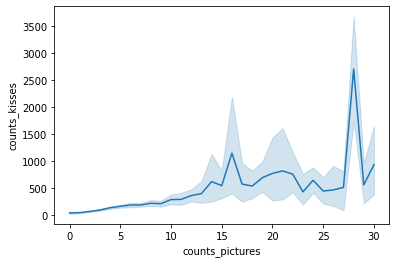

In [133]:
df = pd.DataFrame(data=data, columns=['counts_pictures','counts_kisses'])
seaborn.lineplot(x=df["counts_pictures"], y=df["counts_kisses"])
plot.show(); 

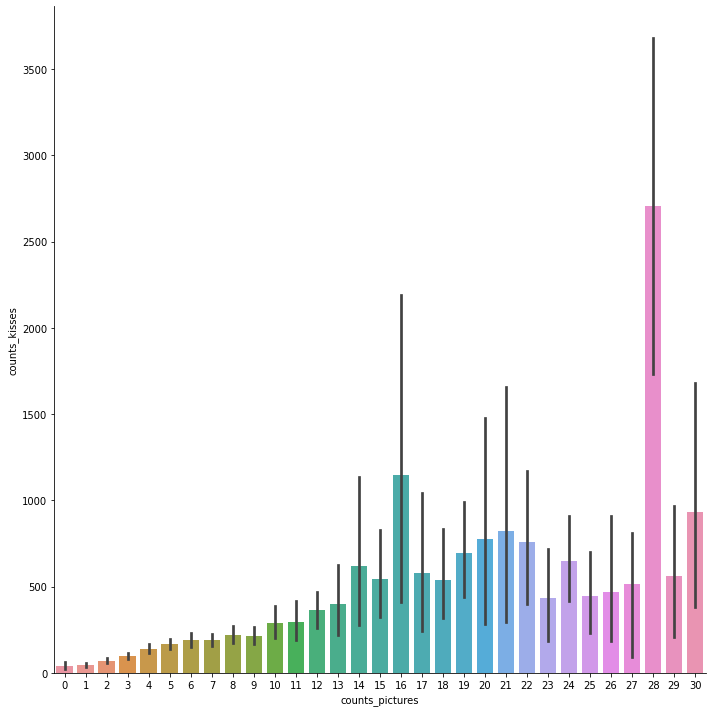

In [134]:
df = pd.DataFrame(data=data, columns=['counts_pictures','counts_kisses']) 
# df[(df['counts_pictures'] < 15) ].plot.scatter(x = 'counts_pictures', y = 'counts_kisses');
seaborn.catplot(x="counts_pictures", y="counts_kisses", data= df, kind="bar", height=10)

Boite à moustache 

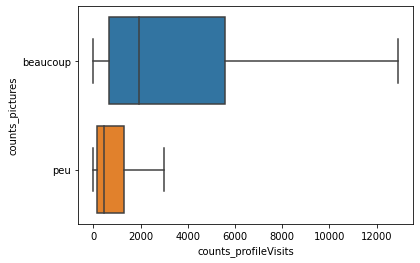

In [13]:
# if df[(df['counts_pictures'] < 2 )]: df['photo'] ='peu'
# else:
#   df['photo'] ='beaucoup'
# seaborn.boxplot(data=df, x="counts_pictures", y="counts_profileVisits")
df = pd.DataFrame(data=data, columns=['counts_profileVisits','counts_pictures'])
df["counts_pictures"].replace({0: "peu", 1: "peu",2: "peu",3: "beaucoup",4:"beaucoup",5: "beaucoup",6:"beaucoup",7: "beaucoup",8:"beaucoup",9: "beaucoup",10:"beaucoup",11: "beaucoup",12:"beaucoup",13: "beaucoup",14:"beaucoup",15: "beaucoup",16:"beaucoup",17: "beaucoup",18:"beaucoup",19: "beaucoup",20:"beaucoup",21: "beaucoup",22:"beaucoup",23: "beaucoup",24:"beaucoup",25: "beaucoup",26:"beaucoup",27: "beaucoup",28:"beaucoup",29: "beaucoup",30:"beaucoup"}, inplace=True)
# plot.show()
# df["counts_pictures"]
seaborn.boxplot(data=df, x="counts_profileVisits", y="counts_pictures",showfliers=False)

mediane + importante pour user qui a plus de 2 photos

In [14]:
df.describe()

,counts_profileVisits
count,3992.000000
mean,3705.467184
std,6845.038330
min,0.000000
25%,383.000000
50%,1222.000000
75%,4063.250000
max,164425.000000


On peut voir que plus un utilisateur a de photos, plus il est vue.
Cette analyse est confirmée par le fait que les utilisateurs avec moin de 2 photos sont beaucoup moin vues.

On test avec la quantité d'info dans sa bio

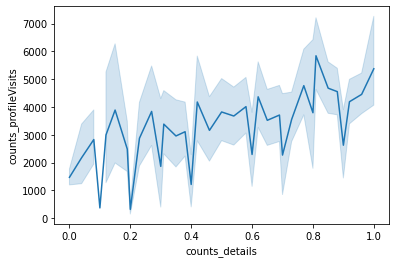

In [16]:
df = pd.DataFrame(data=data, columns=['counts_details','counts_profileVisits'])
seaborn.lineplot(x=df["counts_details"], y=df["counts_profileVisits"])
plot.show(); 


pas interessant

On teste avec l'age des users

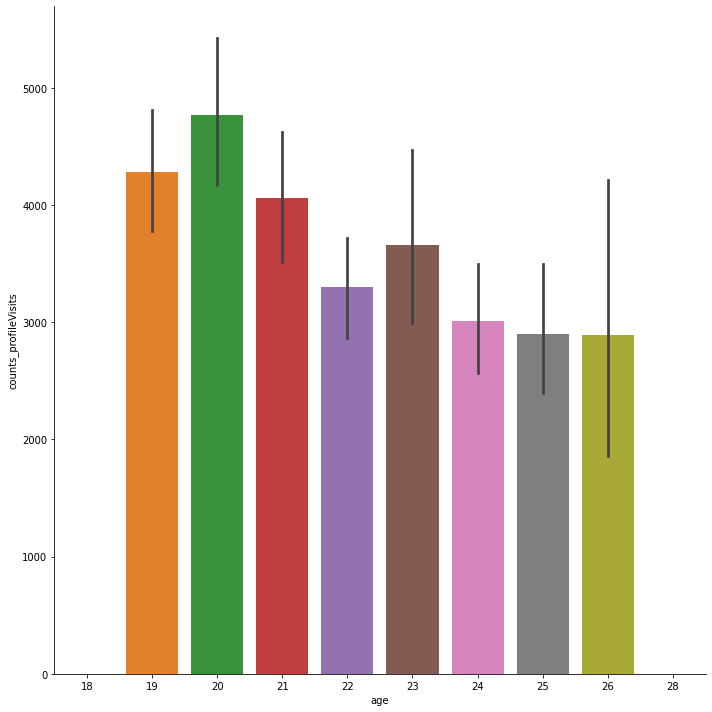

In [136]:
df = pd.DataFrame(data=data, columns=['age','counts_profileVisits'])
df["age"].replace({27: 26}, inplace=True)
seaborn.catplot(x="age", y="counts_profileVisits", data= df, kind="bar", height=10)

Nous aurions envie de dire que plus l'age est bas chez une femme, plus elle est atractive, cependant les ecarts type important ne nous permettes pas de confirmer cette idée 


Nous allons maintenant comparer le temps de connexion de chaque users:

In [137]:
import time
from datetime import datetime
# df = pd.DataFrame(data=data)
df = pd.DataFrame(data=data, columns=['counts_profileVisits','lastOnlineDate','lastOnlineTime'])
df



,counts_profileVisits,lastOnlineDate,lastOnlineTime
0,8279,2015-04-25T20:43:26Z,1.429995e+09
1,663,2015-04-26T09:19:35Z,1.430040e+09
2,1369,2015-04-06T14:24:07Z,1.428330e+09
3,22187,2015-04-07T11:21:01Z,1.428406e+09
4,35262,2015-04-06T14:25:20Z,1.428330e+09
...,...,...,...
3987,1003,2015-04-05T07:13:49Z,1.428218e+09
3988,6890,2015-04-19T11:00:59Z,1.429441e+09
3989,1157,2015-04-19T08:37:52Z,1.429433e+09
3990,1157,2015-04-19T08:37:52Z,1.429433e+09


In [138]:
# df['new_time']=datetime.fromtimestamp()df['lastOnlineTime'][df['lastOnlineTime']]
print(datetime.fromtimestamp(df['lastOnlineTime'][0]))

df['lastOnlineDate'] = pd.to_datetime(df["lastOnlineDate"], infer_datetime_format=True)
df['lastOnlineTime'] = pd.to_datetime(df['lastOnlineTime'], unit='s')
df.lastOnlineTime = df.lastOnlineTime.dt.tz_localize('UTC').dt.tz_convert('Europe/Brussels')

df

# seaborn.relplot(x=value, y=df["item_price"], s=50, height=10)
# plot.show();



2015-04-25 20:43:26


,counts_profileVisits,lastOnlineDate,lastOnlineTime
0,8279,2015-04-25 20:43:26,2015-04-25 22:43:26+02:00
1,663,2015-04-26 09:19:35,2015-04-26 11:19:35+02:00
2,1369,2015-04-06 14:24:07,2015-04-06 16:24:07+02:00
3,22187,2015-04-07 11:21:01,2015-04-07 13:21:01+02:00
4,35262,2015-04-06 14:25:20,2015-04-06 16:25:20+02:00
...,...,...,...
3987,1003,2015-04-05 07:13:49,2015-04-05 09:13:49+02:00
3988,6890,2015-04-19 11:00:59,2015-04-19 13:00:59+02:00
3989,1157,2015-04-19 08:37:52,2015-04-19 10:37:52+02:00
3990,1157,2015-04-19 08:37:52,2015-04-19 10:37:52+02:00


malheureusement les colonnes concernant les temps de connexions en sont pas interessantes car faussées.

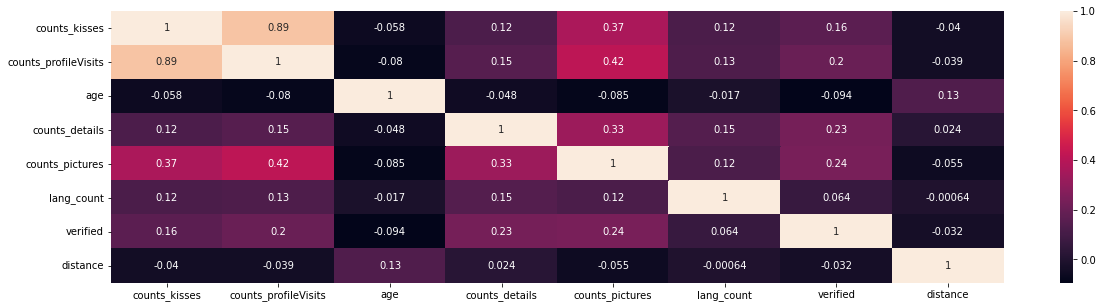

In [139]:
df = pd.DataFrame(data=data, columns=['counts_kisses','counts_profileVisits','age','country','counts_details','counts_pictures','lang_count','verified','distance'])
corr=df.corr()
f, ax = plot.subplots(figsize=(20,5))
seaborn.heatmap(corr, annot=True, ax =ax)
plot.savefig('heatmapEX1.png')